In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("\temp\data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting 	emp\data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting 	emp\data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting 	emp\data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting 	emp\data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
type(mnist.train.images)

numpy.ndarray

In [15]:
sample=mnist.train.images[2]

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
import matplotlib. pyplot as plt

/home/sk/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [18]:
%matplotlib inline

In [19]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [20]:
n_class=10
n_sample=mnist.train.num_examples

In [23]:
n_input=784
n_hidden1=256
n_hidden2=256

In [41]:
def multilayer_percethptron(x,weights,biases):
    #First Hidden Layer with Relu Activation
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer1=tf.nn.relu(layer1)
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['b2'])
    layer2=tf.nn.relu(layer2)
    out_layer=tf.matmul(layer2,weights['out']+biases['out'])
    return out_layer


In [42]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_class]))

}

In [43]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden1])),
    'b2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_class]))
}

In [44]:
x=tf.placeholder('float',[None,n_input])

In [45]:
y=tf.placeholder('float',[None,n_class])

In [46]:
pred=multilayer_percethptron(x,weights,biases)

In [51]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize=(cost)

In [58]:
t=mnist.train.next_batch(1)

In [61]:
len(t)

2

In [59]:
xsamp,ysamp=t


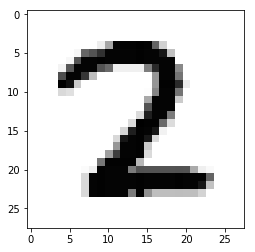

In [64]:
plt.imshow(xsamp.reshape(28,28),cmap='Greys')

In [65]:
sess=tf.InteractiveSession()

In [67]:
init=tf.global_variables_initializer()
sess.run(init)

In [70]:
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(n_sample/batch_size )
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    print("Epoch:{} cost{:4f} ".format(epoch+1,avg_cost))
print("Model has been completed{} Epoch of training".format(training_epochs))

Epoch:1 cost19786.549901 
Epoch:2 cost19785.433892 
Epoch:3 cost19786.703214 
Epoch:4 cost19785.322994 
Epoch:5 cost19786.160756 
Epoch:6 cost19786.793871 
Epoch:7 cost19785.547095 
Epoch:8 cost19785.894705 
Epoch:9 cost19787.065636 
Epoch:10 cost19785.222576 
Epoch:11 cost19786.390092 
Epoch:12 cost19785.264162 
Epoch:13 cost19785.574217 
Epoch:14 cost19787.024577 
Epoch:15 cost19786.476140 
Model has been completed15 Epoch of training


In [71]:
correct_predictions=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [72]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [73]:
correct_predictions=tf.cast(correct_predictions,'float')

In [74]:
print(correct_predictions)

Tensor("Cast_2:0", shape=(?,), dtype=float32)


In [75]:
accuracy=tf.reduce_mean(correct_predictions)

In [76]:
print(accuracy)

Tensor("Mean_2:0", shape=(), dtype=float32)


In [77]:
mnist.test.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [78]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [79]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.098200001